In [169]:
from google.colab import files
uploaded = files.upload()

Saving blogs.csv to blogs.csv


In [170]:
import pandas as pd

# Load dataset
file_path = "/content/blogs.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check dataset size
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Data      0
Labels    0
dtype: int64
Dataset contains 2000 rows and 2 columns.


In [172]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data packages
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab') # Download the punkt_tab data package

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    if isinstance(text, str):  # Ensure it's a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize words
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return " ".join(tokens)  # Join words back into a string
    return ""

# Apply preprocessing to the text column
df["Processed_Data"] = df["Data"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words
X = vectorizer.fit_transform(df["Processed_Data"])  # Transform text to numerical features

# Extract labels
y = df["Labels"]


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8225
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.73      0.76      0.75        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.8

In [176]:
from textblob import TextBlob

def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the "Data" column
df["Sentiment"] = df["Data"].apply(get_sentiment)

# Display sentiment distribution
print(df["Sentiment"].value_counts())


Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


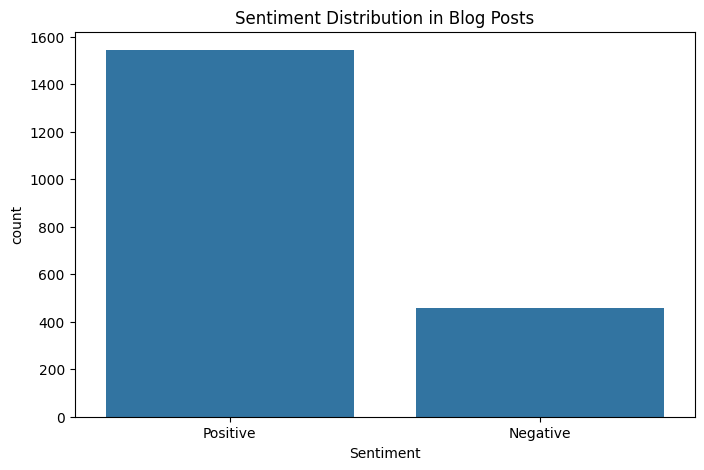

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Sentiment")
plt.title("Sentiment Distribution in Blog Posts")
plt.show()

# Sentiment per category
sentiment_per_category = df.groupby("Labels")["Sentiment"].value_counts().unstack()
print(sentiment_per_category)
